<h1 style="text-align:center;font-weight:bold">Exploring Recommendation Systems: Content Filtering Implementation</h1>

Approaches like recommendations and linking transactions to identify commonly bought items play a crucial role in the online retail industry. They not only enhance the consumer experience but also contribute to boosting revenues.
In this project, we will delve into the realm of recommendation systems for companies in this field. Specifically, we will compare and discuss content-based and collaborative filtering techniques.

To accomplish this, we will leverage the extensive "Book Recommendation Datasets" available on Kaggle. These datasets contain valuable information about book recommendations. We will explore, prepare, and apply these data to two functions: one for content-based filtering and another for collaborative filtering (www.kaggle.com, n.d.).

 <h2 style="text-align:center;font-weight:bold">Libraries</h2>

As stated by Ó Tuama (2022), “Libraries written in Python play a critical role in machine learning and data science. Each module in a Python library serves a specific purpose. Many different programs can benefit from the modularity of this library’s code. There are many advantages for the programmer as a result of this tool.” 

In [1]:
# pip install sweetviz

In [2]:
# Import packages for data handling.
import numpy as np
import pandas as pd
import sweetviz as sv

# Pandas settings
pd.set_option('display.max_columns', None)  # Show all columns when displaying a DataFrame.
pd.set_option('display.max_rows', None)  # Show all rows when displaying a DataFrame.
pd.set_option('display.float_format', '{:.2f}'.format)  # Display format for floating-point numbers.

# Preprocessing
import string
import random

# Machine learning libraries for Content and Collaborative filtering.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# Data visualization packages.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Matplotlib settings.
plt.rcParams['axes.grid'] = True  # Display a grid in the background of plots.
%matplotlib inline

# Seaborn settings.
sns.set_palette('bright')
sns.set_style('whitegrid')
sns.color_palette("bright")

# Image processing libraries.
import requests
from PIL import Image
from io import BytesIO

# General settings.
random.seed(42)  # Set the seed for generating random numbers.
np.random.seed(42)  # Set the seed for generating random numbers with numpy.

In [3]:
# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h3 style="text-align:center;font-weight:bold">Books Dataset</h3>

The dataset is divided into three separate files that must be merged.

In [4]:
# Each set will be shown below separately to assist in the merging process, 
# after that, we will start analyzing the data.

# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df_Books = pd.read_csv("Books.csv", na_values=missing_value_formats)

# Checking missing values.
if df_Books.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

display(df_Books.head()) # Display first 5 records.
print("Shape of the dataset:", df_Books.shape) # Display shape.

There are missing values in the data.


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Shape of the dataset: (271360, 8)


<h3 style="text-align:center;font-weight:bold">Books Users Dataset</h3>

In [5]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df_Users = pd.read_csv("Users.csv", na_values=missing_value_formats)

# Checking missing values.
if df_Users.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

display(df_Users.head()) # Display first 5 records.
print("Shape of the dataset:", df_Users.shape) # Display shape.

There are missing values in the data.


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.00
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.00
4,5,"farnborough, hants, united kingdom",NaN


Shape of the dataset: (278858, 3)


<h3 style="text-align:center;font-weight:bold">Books Users Rate Dataset</h3>

In [6]:
# Checking missing value formats and read data.
missing_value_formats = ["na", "n.a.", "?", "NA", "n/a", "--"]
df_Ratings = pd.read_csv("Ratings.csv", na_values=missing_value_formats)

# Checking missing values.
if df_Ratings.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

display(df_Ratings.head()) # Display first 5 records.
print("Shape of the dataset:", df_Ratings.shape) # Display shape.

No missing values.


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Shape of the dataset: (1149780, 3)


In [7]:
# Ensure that the original data preserved.
Books = df_Books.copy()
Users = df_Users.copy()
Ratings = df_Ratings.copy()

<h3 style="text-align:center;font-weight:bold">Merging the datasets</h3>

As mentioned by  Myrianthous (2022) "Usually, we may have to merge together Data Frames in order to build a new Data Frame containing columns and rows from the involved parties, based on some logic that will eventually serve the purpose of the task we are working on." The first two data sets merged by how='left'.

In [8]:
# Merging the 'Users' dataset with the 'Ratings' dataset.
book_recommendation = Users.merge(Ratings, on='User-ID', how='left')
book_recommendation.dropna(inplace=True) # Remove missing values.

# Checking missing values.
if book_recommendation.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

print("\nNew shape of the dataset:", book_recommendation.shape) # Display shape.
display(book_recommendation.head()) # Display first 5 records.

No missing values.

New shape of the dataset: (840288, 5)


,User-ID,Location,Age,ISBN,Book-Rating
1,2,"stockton, california, usa",18.00,0195153448,0.00
28,10,"albacete, wisconsin, spain",26.00,1841721522,0.00
29,10,"albacete, wisconsin, spain",26.00,8477024456,6.00
48,19,"weston, ,",14.00,0375759778,7.00
49,20,"langhorne, pennsylvania, usa",19.00,0425163091,0.00


<h2 style="text-align:center;font-weight:bold">Book Recommendation</h2>

Now start the project after merging the last dataset.

In [9]:
# Merging the 'book_recommendation' updated dataset with the 'Books' dataset.
book_recommendation = book_recommendation.merge(Books, on='ISBN', how='left')
book_recommendation.dropna(inplace=True) # Removing missing values.

# Checking missing values.
if book_recommendation.isna().sum().sum() == 0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

print("\nNew shape of the dataset:", book_recommendation.shape) # Printing the new shape of the dataset.
display(book_recommendation.head()) # Display.
print("\nInformation about the dataset:\n")
book_recommendation.info()

No missing values.

New shape of the dataset: (753296, 12)


,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.00,0195153448,0.00,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,10,"albacete, wisconsin, spain",26.00,1841721522,0.00,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
3,19,"weston, ,",14.00,0375759778,7.00,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...
4,20,"langhorne, pennsylvania, usa",19.00,0425163091,0.00,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...
5,36,"montreal, quebec, canada",24.00,067176537X,0.00,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...



Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 0 to 840287
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              753296 non-null  int64  
 1   Location             753296 non-null  object 
 2   Age                  753296 non-null  float64
 3   ISBN                 753296 non-null  object 
 4   Book-Rating          753296 non-null  float64
 5   Book-Title           753296 non-null  object 
 6   Book-Author          753296 non-null  object 
 7   Year-Of-Publication  753296 non-null  object 
 8   Publisher            753296 non-null  object 
 9   Image-URL-S          753296 non-null  object 
 10  Image-URL-M          753296 non-null  object 
 11  Image-URL-L          753296 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 74.7+ MB


<h3 style="text-align:center;font-weight:bold">EDA/ Data Visualizations</h3>

In this phase, a continuous exploration of the data will begin, in order to understand and also define the next stages of the project.

As mentioned by Sinek (2009) "Starting with Why has become a well-known purpose lecture. He begins by asking himself, Why do we do this? How do we do this? What do we do? It's a great way to focus in on what's really essential for moving the project forward."

Because this part only deals with exploration throughout the project it will be determined whether these data should be handled or not, with the project's interests in mind.

In [10]:
book_recommendation['Year-Of-Publication'] = pd.to_numeric(book_recommendation['Year-Of-Publication'], errors='coerce')

To explore EDA-related visualization techniques on panels, let's use the SweetViz tool. 

In accordance with Patil (2021) "SweetViz Library is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code. Output is a fully self-contained HTML application. The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks."

In [11]:
report_1_EDA=sv.analyze(book_recommendation)
report_1_EDA.show_html("eda_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<h3 style="text-align:center;font-weight:bold">Statistical information</h3>

In [12]:
# Looking at some statistical data.
book_recommendation.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
User-ID,753296.00,141231.21,78828.59,2.00,74453.00,141493.00,209156.00,278852.00
Age,753296.00,37.40,14.10,0.00,28.00,35.00,45.00,244.00
Book-Rating,753296.00,2.77,3.86,0.00,0.00,0.00,7.00,10.00
Year-Of-Publication,753296.00,1967.67,233.41,0.00,1992.00,1997.00,2001.00,2050.00


In [13]:
# Looking at some statistical data 'object'.
book_recommendation.describe(include='object').T

,count,unique,top,freq
Location,753296,16156,"toronto, ontario, canada",12147
ISBN,753296,228996,0971880107,2141
Book-Title,753296,205170,Wild Animus,2141
Book-Author,753296,87236,Stephen King,7664
Publisher,753296,14500,Ballantine Books,24707
Image-URL-S,753296,228777,http://images.amazon.com/images/P/0971880107.0...,2141
Image-URL-M,753296,228777,http://images.amazon.com/images/P/0971880107.0...,2141
Image-URL-L,753296,228777,http://images.amazon.com/images/P/0971880107.0...,2141


#### EDA/ Data Visualizations (Analyzes)

The analysis and exploration of the data were made more efficient and agile by the usage of the data visualisation tool. The simple, one line of code approach allowed us to list the some points:

* The dataset contains 12 variables, 4 numerical and 8 categorical.


* Each variable has a clear name and definition.


* The dataset is fairly huge and has the following dimensions: (753296, 12).


* There are no duplicate rows or missing values in the dataset.


* City, state, and country are separated from one another by commas in the location variable.


* The variable age has a significantly higher number of users between the ages of 30 and 30.


* On a range of 1 to 10, the majority of books have ratings below 2.


* The majority of the books were published between 1850 and 2000, but there are a number of outliers that were appeared around the year 0.


* Almost all text variables contain mistakes, some of which lack a pattern or are out of context.


* Year-Of-Publication is an object data type, but it should be converted to numeric for the best performance. Already completed in the code line above.

Exploration is still underway as there may be some other aspects that have not yet been identified that come as a surprise during the project.

<h3 style="text-align:center;font-weight:bold">Data preparation I</h3>

Some correspondence points that have already been added in the EDA above will be carried out during the first step of data preparation.

* Leaving only an image variable for future use.

In [14]:
book_recommendation.drop(['Image-URL-S', 'Image-URL-M'], axis=1, inplace=True)
print("Shape do DataFrame:", book_recommendation.shape)
print("Colunas do DataFrame:", book_recommendation.columns.tolist())

Shape do DataFrame: (753296, 10)
Colunas do DataFrame: ['User-ID', 'Location', 'Age', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']


* In order to prevent any errors it is verified to see if the 'ISBN' column contains alphabetic characters.


* Age, Book Rating, and Year of Publication variables were converted to data of data type "int64" (numeric).

In [15]:
# The modified dataset information was displayed using the 'info( )' method when preparation ended.
# Checking for alphabetic characters in the 'ISBN' column
book_recommendation[book_recommendation['ISBN'].str.contains('([A-Za-z])') == True]

# Removing the comma and making it uppercase.
book_recommendation['Country'] = book_recommendation['Location'].str.split(',').str[-1].str.strip().str.upper()
book_recommendation = book_recommendation[book_recommendation['Country'].str.strip() != '']
book_recommendation.drop('Location', axis=1, inplace=True) # Dropping the 'Location' column.

# Converting 'Age','Book_Rating' and 'Year-Of-Publication' to dtype int64.
book_recommendation['Age'] = book_recommendation['Age'].astype('int64', errors='ignore')
book_recommendation['Book-Rating'] = book_recommendation['Book-Rating'].astype('int64', errors='ignore')
book_recommendation['Year-Of-Publication'] = book_recommendation['Year-Of-Publication'].astype('int64', errors='ignore')
book_recommendation.info() # Displaying the updated info.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742618 entries, 0 to 840287
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              742618 non-null  int64 
 1   Age                  742618 non-null  int64 
 2   ISBN                 742618 non-null  object
 3   Book-Rating          742618 non-null  int64 
 4   Book-Title           742618 non-null  object
 5   Book-Author          742618 non-null  object
 6   Year-Of-Publication  742618 non-null  int64 
 7   Publisher            742618 non-null  object
 8   Image-URL-L          742618 non-null  object
 9   Country              742618 non-null  object
dtypes: int64(4), object(6)
memory usage: 62.3+ MB


<h3 style="text-align:center;font-weight:bold">Data Visualization Book Recommendation</h3>

As previously mentioned, the dataset is very large; one way to deal with this is by adjusting the filters, either by sample or studies of pre-defined demographic groups. In this step, more personalised views will be made in accordance with the project's interest to support potential future decisions.

Among the views are:

 * Age Distribution (18-35).
 
 * Top Countries with More Ratings and High Ratings (Rating > 7).
 
 * Top 10 Most Rated Books and Their Countries.
 
 * Top 10 Most Rated Books by Author and Their Countries.
 
The priority here is to study filters and in most of them use the 'Book-Rating' as the main factor, as it is a recommendation system, the books with the highest rating are the target, in order to explore new filters, such as books, authors, countries and so on. A comparison was also done between an age group (18-35) and the entire dataset because, as was already indicated, the majority of users fall into this age range.

#### Age Distribution (18-35).

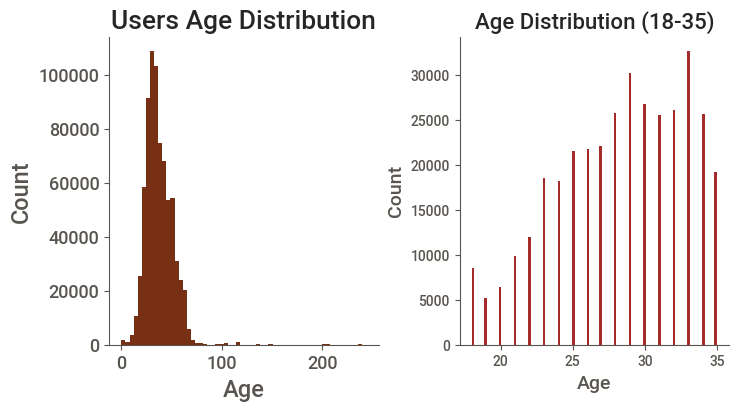

In [16]:
# Define width and height.
WIDTH = 800
HEIGHT = 400

# Create the figure and subplots.
fig, axs = plt.subplots(1, 2, figsize=(WIDTH/100, HEIGHT/100))
sns.despine(left=False, bottom=False, right=True, top=True) # Spines.

# Plot the histogram for the total age distribution.
axs[0].hist(book_recommendation['Age'], bins=60, color='#783014')
axs[0].set_title('Users Age Distribution', fontsize=19, fontweight='bold')
axs[0].set_xlabel('Age', fontsize=17)
axs[0].set_ylabel('Count', fontsize=17)
axs[0].tick_params(axis='x', labelsize=13)
axs[0].tick_params(axis='y', labelsize=13)

# Plot the histogram for the age distribution between 18 and 35.
axs[1].hist(book_recommendation[(book_recommendation['Age'] >= 18) & (book_recommendation['Age'] <= 35)]['Age'], bins=100, color='brown')
axs[1].set_title('Age Distribution (18-35)', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Age', fontsize=14)
axs[1].set_ylabel('Count', fontsize=14)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
plt.subplots_adjust(wspace=0.3) # Configure spacing between subplots.
plt.show()

#### Top Countries with More Ratings and High Ratings (Rating > 8).

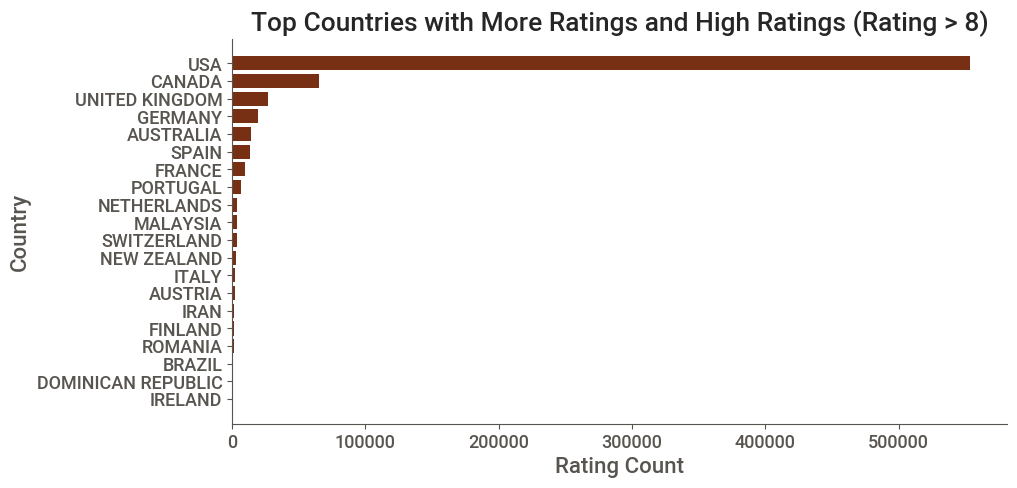

In [17]:
# Define width and height.
WIDTH = 1000
HEIGHT = 500

# Group and count ratings by location.
location_counts = book_recommendation.groupby('Country')['Book-Rating'].count().sort_values(ascending=False)[:20]
location_counts = location_counts.sort_values(ascending=True)  # Sort the locations by count in ascending order.

# Filter locations with rate greater than 6.
high_rate_locations = book_recommendation[book_recommendation['Book-Rating'] > 8]['Country'].value_counts()
filtered_locations = location_counts.index.intersection(high_rate_locations.index) # Combine the two conditions.

# Create the horizontal bar plot.
plt.barh(filtered_locations, location_counts[filtered_locations], color='#783014')
plt.title('Top Countries with More Ratings and High Ratings (Rating > 8)', fontsize=19, fontweight='bold') # Title.
plt.gcf().set_size_inches(WIDTH/100, HEIGHT/100) # Size.
sns.despine(left=False, bottom=False, right=True, top=True) # Spines.
plt.xlabel('Rating Count', fontsize=16) # Configure x,y-axis settings.
plt.ylabel('Country', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### Top 10 Most Rated Books and Their Countries.

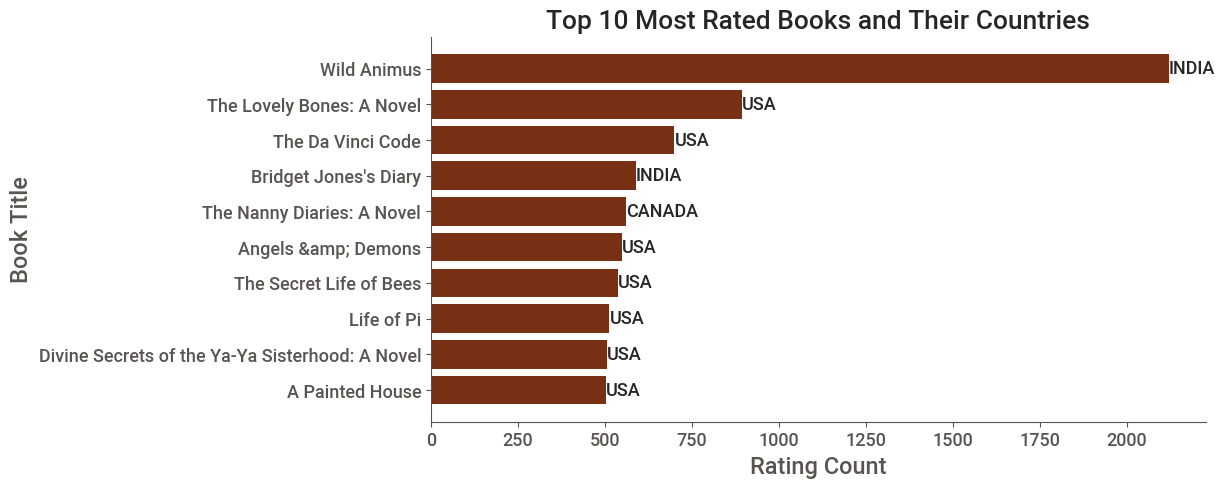

In [18]:
# Define width and height.
WIDTH = 1000
HEIGHT = 500

# Group and count ratings by book.
book_counts = book_recommendation[book_recommendation['Book-Rating'] > 7]
book_counts = book_recommendation.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:10]
book_counts = book_counts.sort_values(ascending=True)

# Create the bar plot.
plt.barh(book_counts.index, book_counts.values, color='#783014')
plt.title('Top 10 Most Rated Books and Their Countries', fontsize=19, fontweight='bold') # Title.
plt.gcf().set_size_inches(WIDTH/100, HEIGHT/100) # Size.
sns.despine(left=False, bottom=False, right=True, top=True) # Spines.
plt.xlabel('Rating Count', fontsize=17) # Configure x,y-axis settings.
plt.ylabel('Book Title', fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for i, book_title in enumerate(book_counts.index): # Add country information to the plot.
    country = book_recommendation.loc[book_recommendation['Book-Title'] == book_title, 'Country'].values[0]
    plt.text(book_counts.values[i], i, country, ha='left', va='center', fontsize=13)
plt.show()

#### Top 10 Most Rated Books by Author and Their Countries.

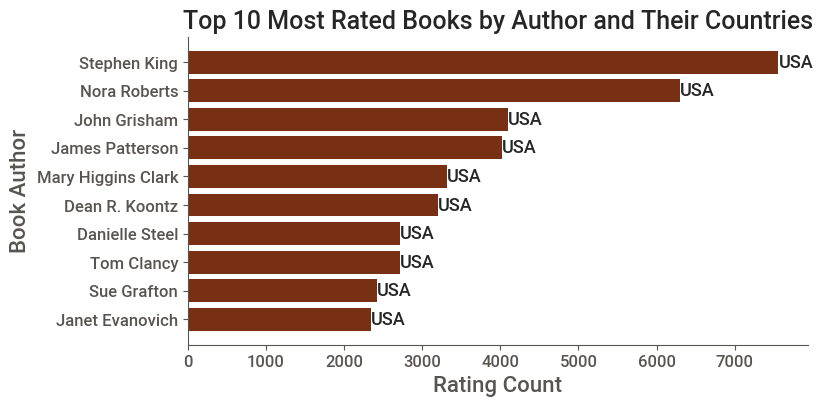

In [19]:
# Define width and height.
WIDTH = 800
HEIGHT = 400

# Group and count ratings by book author.
author_counts = book_recommendation[book_recommendation['Book-Rating'] > 7]
author_counts = book_recommendation.groupby('Book-Author')['Book-Rating'].count().sort_values(ascending=False)[:10]
author_counts = author_counts.sort_values(ascending=True)

# Create the bar plot.
plt.barh(author_counts.index, author_counts.values, color='#783014')
plt.title('Top 10 Most Rated Books by Author and Their Countries', fontsize=18, fontweight='bold') # Title.
plt.gcf().set_size_inches(WIDTH/100, HEIGHT/100) # Size.
sns.despine(left=False, bottom=False, right=True, top=True) # Spines.
plt.xlabel('Rating Count', fontsize=16) # Configure x,y-axis settings.
plt.ylabel('Book Author', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, author in enumerate(author_counts.index): # Add country information to the plot.
    country = book_recommendation.loc[book_recommendation['Book-Author'] == author, 'Country'].values[0]
    plt.text(author_counts.values[i], i, country, ha='left', va='center', fontsize=13)
plt.show()

<h3 style="text-align:center;font-weight:bold">Data preparation II</h3>

### Filtering the data

Based on the visualizations and what was already discussed above, in this second part of data preparation we are going to start filtering the data.

#### Select people between 18 and 35 years old.

This age group was chosen because a large part of the data distribution is concentrated in this age group.

In [20]:
# Create a subset for people aged between 18 and 35.
book_recommendation_18_35 = book_recommendation[(book_recommendation['Age'] >= 18) & (book_recommendation['Age'] <= 35)]
print("\nNew shape:", book_recommendation.shape) # Print the new shape.


New shape: (742618, 10)


#### Group the books by their title and calculate the average rating.

In [21]:
# Group the books by their title and calculate the average rating.
book_recommendation = book_recommendation.groupby('Book-Title').agg({
    'User-ID': 'first',
    'Age': 'first',
    'ISBN': 'first',
    'Book-Rating': 'mean',
    'Book-Author': 'first',
    'Year-Of-Publication': 'first',
    'Publisher': 'first',
    'Image-URL-L': 'first',
    'Country': 'first'
}).reset_index()

# Print the new shape and columns of the grouped DataFrame
print("New shape:", book_recommendation.shape)

New shape: (203766, 10)


#### Select ratings from 7 upwards

Because it is a recommendation system that should only be applied to books with a score of at least 7, readers are given access to higher quality information.

In [22]:
# Drop ratings below 6 in the subset.
book_recommendation = book_recommendation_18_35.drop(book_recommendation_18_35[book_recommendation_18_35['Book-Rating'] < 7].index)
print("\nNew shape:", book_recommendation.shape) # Print the new shape.


New shape: (98963, 10)


#### Selecting only USA, Canada and United Kingdom

Compared to the rankings displayed above, these countries are clearly highlighted, related to the quality of content according to users, which is why they are being selected for the recommendation dataset.

In [23]:
# List of countries in America.
selected_countries = [ 'USA', 'CANADA', 'UNITED KINGDOM']

# Filter df to only include rows from South American countries.
book_recommendation = book_recommendation[book_recommendation['Country'].isin(selected_countries)]
print("\nNew shape:", book_recommendation.shape) # Print the new shape.
book_recommendation['Country'].unique() # Printing the countries to check if it is correct.


New shape: (77790, 10)


array(['USA', 'CANADA', 'UNITED KINGDOM'], dtype=object)

To ensure there is no data lack, all filters were created, and the dimensions of the data set were checked at each stage.

#### Reorder the columns in 'book_recommendation' DataFrame.

In [24]:
book_recommendation = book_recommendation[['User-ID', 'Age', 'Country','ISBN' ,'Book-Title' ,'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L','Book-Rating']]
book_recommendation.reset_index(drop=True, inplace=True) # Reset the index of 'book_recommendation' DataFrame.

In [25]:
print("Columns:", book_recommendation.columns)

Columns: Index(['User-ID', 'Age', 'Country', 'ISBN', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-L', 'Book-Rating'],
      dtype='object')


<h2 style="text-align:center;font-weight:bold">Content Filtering (Implementation)</h2>

Returning to the project itself and beginning to apply these recommendation techniques.

#### Book Recommendation

In [26]:
print("Shape of the dataset:", book_recommendation.shape) # Display shape.
display(book_recommendation.head()) # Displaying first 5 records.

Shape of the dataset: (77790, 10)


,User-ID,Age,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,Book-Rating
0,51,34,USA,0440225701,The Street Lawyer,JOHN GRISHAM,1999,Dell,http://images.amazon.com/images/P/0440225701.0...,9
1,56,24,USA,0671623249,LONESOME DOVE,Larry McMurtry,1986,Pocket,http://images.amazon.com/images/P/0671623249.0...,7
2,56,24,USA,0679865691,Haveli (Laurel Leaf Books),SUZANNE FISHER STAPLES,1995,Laurel Leaf,http://images.amazon.com/images/P/0679865691.0...,9
3,78,18,USA,0394895894,"The Ruby in the Smoke (Sally Lockhart Trilogy,...",PHILIP PULLMAN,1988,Laurel Leaf,http://images.amazon.com/images/P/0394895894.0...,8
4,254,24,USA,0060502320,"I've Got You, Babe",Karen Kendall,2002,Avon,http://images.amazon.com/images/P/0060502320.0...,7


<h3 style="text-align:center;font-weight:bold">Book Recommendation (SAMPLE)</h3>

#### Note :

*It was necessary to generate a sample at this point due to memory issues and the high dimension data processing; this sample was generated at random and will be employed for the two methods.*

In [27]:
# Create a 20% sample of the DataFrame.
subset_df = book_recommendation.sample(frac=0.2, random_state=42)
print("Shape of the sample dataset:", subset_df.shape)

Shape of the sample dataset: (15558, 10)


Since a text-containing variable will be used in this step, data processing will be required before applying the data to a lean machine model. As reported by Nabi (2018) "Text Processing is one of the most common task in many ML applications. Below are some examples of such applications."

In [28]:
# Remove parentheses from all columns.
df_content = subset_df.replace({'\(': '', '\)': '', ',': ''}, regex=True)
df_content[['Book-Title', 'Book-Author', 'Publisher','Country']].head(10) # Print the features.

,Book-Title,Book-Author,Publisher,Country
55245,Sunny Diary 3 California Diaries 12,Ann M. Martin,Scholastic,USA
62309,One Last Time: A Psychic Medium Speaks to Thos...,John Edward,Berkley Publishing Group,USA
46362,Thoreau: A Book of Quotations Dover Thrift Edi...,Henry David Thoreau,Dover Publications,USA
1792,Married for a Month,Susan Mallery,Pocket Books,USA
31165,A Wrinkle in Time,Madeleine L'Engle,Farrar Straus Giroux,CANADA
10099,This Rolling Land Serenade/Saga No 29,Sandy Dengler,Zondervan,USA
4878,He's My Baby Now,Jeannette Eyerly,Pocket Books,USA
52503,Cheri and the Last of Cheri,Colette,Farrar Straus Giroux,USA
18838,Jack Maggs,Peter Carey,Vintage Books USA,USA
25630,The Pelican Brief,John Grisham,Dell,CANADA


The three variables "Book-Title," "Book-Author," and "Publisher" will each receive the clean_data function processing before being put in a new variable named "Content."

In [29]:
# Function to convert all strings to lower case, strip names of spaces, and remove punctuation.
def clean_data(x):
    if isinstance(x, str):
        x = x.lower().replace(" ", "")
        x = x.translate(str.maketrans('', '', string.punctuation))
        return x
    else:
        return x
    
# Apply clean_data function to the relevant columns
df_content['Book-Title'] = df_content['Book-Title'].apply(clean_data)
df_content['Book-Author'] = df_content['Book-Author'].apply(clean_data)
df_content['Publisher'] = df_content['Publisher'].apply(clean_data)    
df_content['Publisher'] = df_content['Publisher'].apply(clean_data)

# Create the 'Content' column.
df_content['Content'] = df_content['Book-Title'] + ' ' + df_content['Book-Author'] + ' ' + df_content['Publisher'] + ' ' + df_content['Country']

The "TfidfVectorizer" is in charge of converting a collection of text documents into a numeric matrix.  This was done for the "Content" resource created by the "tfidf_matrix," which now has the attributes of the variables in numerical format.(Singhal, 2020)

#### CountVectorizer and TfidfVectorizer.

As claimed by Kapl et al. (2022) "TF-IDF Vectorizer and Count Vectorizer are both methods used in natural language processing to vectorize text. However, there is a fundamental difference between the two methods. CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus."

TfidfVectorizer was chosen for this project because it can weight phrases according to their importance, which can lead to a better analysis of the texts. 

In [30]:
# Create the TF-IDF feature matrix.
tfidf = TfidfVectorizer(stop_words='english') # The "stop_words="english"" parameter was added, and words often used in English such as "a," "is," "and," and outs are excluded from the analysis because they typically do not match significantly.
tfidf_matrix = tfidf.fit_transform(df_content['Content'])

In agreement with R (2021) "Cosine similarity at it’s most basic definition is measuring the similarity between two documents, regardless of the size of each document."

Basically, this could be very useful for taking a particular document, or in this case a Book titles, and finding those that are similar.

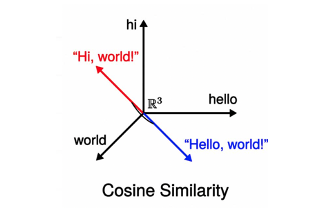

As believed by Melanee (2023) "Cosine kernels are similarity measures that can be used to compare two vectors in a high-dimensional feature space. Cosine kernels are defined as functions that take two vectors as input and return a scalar value that represents the cosine of the angle between the vectors."

Basically, this could be very useful for taking a particular document, or in this case a Book titles, and finding those that are similar.

In [31]:
# Calculate the cosine similarity between the books.
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

<h3 style="text-align:center;font-weight:bold">Recommendation function I</h3>

Finally, using the filtered dataset and the knowledge contained in cosine_similarities, due to linear_kernel, we will create the function that will recommend books. (Bezerra , 2023)

#### Recommendation I

Recommendations for 'Married for a Month':


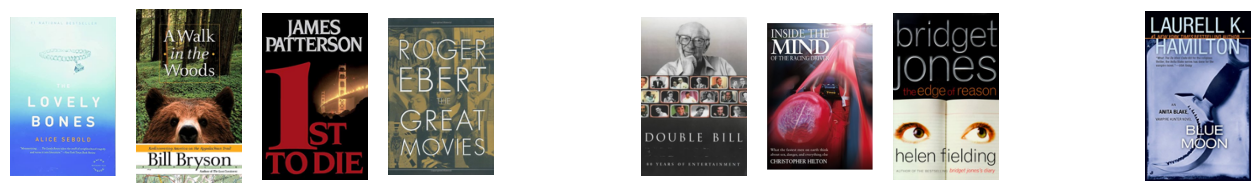

In [32]:
def get_recommendations(book_title):
    if book_title not in indices:
        print("Sorry, the name of the book is incorrect.")
        return []

    idx = indices[book_title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: np.max(x[1]), reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return subset_df.loc[book_indices, ['Book-Title', 'Image-URL-L']]

# Get recommendations.
book_title = 'Married for a Month'  # Set the book title for which recommendations will be generated.
subset_df = subset_df.sample(frac=1, random_state=0).reset_index(drop=True)  # Shuffle the Data.
indices = pd.Series(subset_df.index, index=subset_df['Book-Title'])

try:
    recommendations = get_recommendations(book_title)
    print(f"Recommendations for '{book_title}':")
    if len(recommendations) == 0:
        print("No recommendations available.")
    else:
        fig, axs = plt.subplots(1, len(recommendations), figsize=(16, 4))  # Create a figure with subplots to display the recommendations.
        for i, (_, book) in enumerate(recommendations.iterrows()):
            url = book['Image-URL-L']
            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))  # Open the image from the response content.
                image.thumbnail((200, 200))  # Resize the image.
                axs[i].imshow(image)  # Display subplots.
                axs[i].axis('off')
            else:
                print(f"Unable to retrieve the image for '{book['Book-Title']}'")
except KeyError:
    print("Sorry, the name of the book is incorrect.")

# Along with to the given book, the method selects the 10 books that are the most comparable to it and extracts 
# their indexes from them, these indexes are utilised to obtain information about these books by returning the 
# rows titled "Book-Title" and "Image-URL-L" (cover picture). 

# It was also added message to avoid errors on multiple attempts.

In [33]:
get_recommendations('Married for a Month')

,Book-Title,Image-URL-L
4,The Lovely Bones,http://images.amazon.com/images/P/0316168815.0...
9882,A Walk in the Woods: Rediscovering America on ...,http://images.amazon.com/images/P/0767902513.0...
711,1st to Die: A Novel,http://images.amazon.com/images/P/0316666009.0...
4088,The Great Movies,http://images.amazon.com/images/P/076791032X.0...
4877,The Russian Revolution (OPUS S.),http://images.amazon.com/images/P/0192892576.0...
3223,Double Bill,http://images.amazon.com/images/P/1841153281.0...
13738,Inside the Mind of the Grand Prix Driver: The ...,http://images.amazon.com/images/P/1859608337.0...
13897,Bridget Jones : The Edge of Reason,http://images.amazon.com/images/P/0670892963.0...
14204,Christopher and gay;: A partisan's view of the...,http://images.amazon.com/images/P/0841502439.0...
14976,Blue Moon,http://images.amazon.com/images/P/0515134457.0...


#### Recommendation II

Recommendations for 'Jack Maggs':


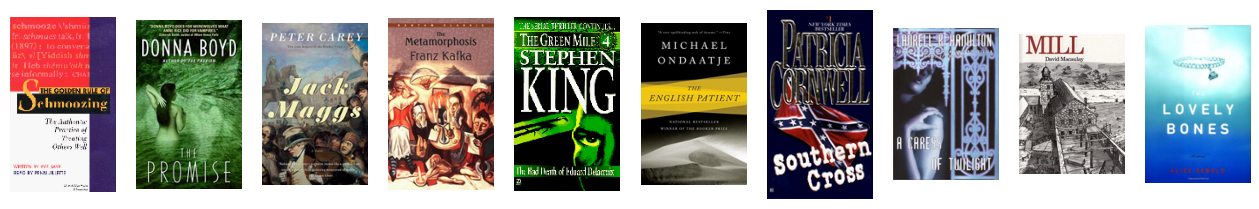

In [34]:
def get_recommendations(book_title):
    if book_title not in indices:
        print("Sorry, the name of the book is incorrect.")
        return []

    idx = indices[book_title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: np.max(x[1]), reverse=True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return subset_df.loc[book_indices, ['Book-Title', 'Image-URL-L']]

# Get recommendations.
book_title = 'Jack Maggs'  # Set the book title for which recommendations will be generated.
subset_df = subset_df.sample(frac=1, random_state=0).reset_index(drop=True)  # Shuffle the Data.
indices = pd.Series(subset_df.index, index=subset_df['Book-Title'])

try:
    recommendations = get_recommendations(book_title)
    print(f"Recommendations for '{book_title}':")
    if len(recommendations) == 0:
        print("No recommendations available.")
    else:
        fig, axs = plt.subplots(1, len(recommendations), figsize=(16, 4))  # Create a figure with subplots to display the recommendations.
        for i, (_, book) in enumerate(recommendations.iterrows()):
            url = book['Image-URL-L']
            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                image = Image.open(BytesIO(response.content))  # Open the image from the response content.
                image.thumbnail((200, 200))  # Resize the image.
                axs[i].imshow(image)  # Display subplots.
                axs[i].axis('off')
            else:
                print(f"Unable to retrieve the image for '{book['Book-Title']}'")
except KeyError:
    print("Sorry, the name of the book is incorrect.")

In [35]:
get_recommendations('Jack Maggs')

,Book-Title,Image-URL-L
5886,The Golden Rule of Schmoozing,http://images.amazon.com/images/P/1885408226.0...
6148,The Promise,http://images.amazon.com/images/P/0380790963.0...
6262,Jack Maggs,http://images.amazon.com/images/P/0679760377.0...
7250,The Metamorphosis (Bantam Classics),http://images.amazon.com/images/P/0553213695.0...
7323,The Green Mile: The Bad Death of Eduard Delacr...,http://images.amazon.com/images/P/0451190556.0...
11123,The English Patient,http://images.amazon.com/images/P/0679745203.0...
13536,Southern Cross,http://images.amazon.com/images/P/0425172546.0...
14602,A Caress of Twilight (Meredith Gentry Novels (...,http://images.amazon.com/images/P/0345435273.0...
14696,Mill,http://images.amazon.com/images/P/0395520193.0...
12126,The Lovely Bones: A Novel,http://images.amazon.com/images/P/0316666343.0...


<h3 style="text-align:center;font-weight:bold">Recommendation system review</h3>

The functions is extremely extensive, however a number of changes were made based on the sequence of errors that had to be modified for the function to run in order to suggest the book's cover. The function initially constantly offered the same recommendations for various books; this was investigated to understand this bug, and I believe it recommended in accordance with the order found in the dataset. 

However, once I added the dataset shuffling, it began to suggest various books in various interactions. Shuffling  the data set in this function did not produce positive results, but the investigation must be employed throughout the project. Once again, it has become quite extensive. Tests such as using the same previous function or adapting it were done, but without success, along with different references and technological help this system was assembled below.

"Data isn’t units of information. Data is a story about human behavior - about real people's wants, needs, goals and fears. Never let the numbers, platforms, charts and methodologies cloud your vision. Our real job with data is to better understand these very human stories, so we can better serve these people. Every goal your business has is directly tied to your success in understanding and serving people." — Daniel Burstein

<h2 style="text-align:center;font-weight:bold">Reference list</h2>

Baptiste Rocca (2019). Introduction to recommender systems. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada.

Bezerra , Z. (2023). Recommendation Systems & Interactive Data Viz. [online] kaggle.com. Available at: https://www.kaggle.com/code/zilmabezerra/recommendation-systems-interactive-data-viz [Accessed 24 May 2023].

Di Stefano, A. (2022). Machine Learning in Recommendation Systems: an Overview. [online] www.itransition.com. Available at: https://www.itransition.com/machine-learning/recommendation-systems.

Kapl, D., coding, ylan K. has years of experience as a S.D.S.H. enjoys, teaching and everyone, has created this website to make M.L. accessible to (2022). Machine Learning 101: CountVectorizer Vs TFIDFVectorizer» EML. [online] enjoymachinelearning.com. Available at: https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/?utm_content=cmp-true.

MacKenzie, I., Meyer, C. and Noble, S. (2013). How retailers can keep up with consumers. [online] McKinsey & Company. Available at: https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers.

Maruti Techlabs (2017). 5 Advantages Recommendation Engines can Offer to Businesses. [online] Medium. Available at: https://towardsdatascience.com/5-advantages-recommendation-engines-can-offer-to-businesses-10b663977673.

Melanee, M. (2023). What a data scientist should know about machine learning kernels? [online] MLearning.ai. Available at: https://medium.com/mlearning-ai/what-a-data-scientist-should-know-about-machine-learning-kernels-4066f02d1f26 [Accessed 23 May 2023].

Myrianthous, G. (2022). How To Merge Pandas DataFrames. [online] Medium. Available at: https://towardsdatascience.com/how-to-merge-pandas-dataframes-221e49c41bec [Accessed 22 May 2023].

Nabi, J. (2018). Machine Learning — Text Processing. [online] Towards Data Science. Available at: https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958.

Patil, R. (2021). SweetViz Library - EDA in Seconds. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/05/sweetviz-library-eda-in-seconds/ [Accessed 22 May 2023].

R, R. (2021). Cosine Similarity and TFIDF. [online] Web Mining [IS688, Spring 2021]. Available at: https://medium.com/web-mining-is688-spring-2021/cosine-similarity-and-tfidf-c2a7079e13fa.

Roddewig , S. (2022). Removing Duplicated Data in Pandas: A Step-by-Step Guide. [online] blog.hubspot.com. Available at: https://blog.hubspot.com/website/duplicated-pandas.

Santos, G. (2020). Criando Sistemas de Recomendação em Python. [online] Data Hackers. Available at: https://medium.com/data-hackers/criando-sistemas-de-recomenda%C3%A7%C3%A3o-em-python-ef350f601e3d [Accessed 23 May 2023].

Santos, G. (2022). Why You Must Use Plotly Express for Data Visualization. [online] Medium. Available at: https://towardsdatascience.com/why-you-must-use-plotly-express-for-data-visualization-9d47f9182807.

Sareen, S. (2018). Process Text using TFIDF in Python. [online] Medium. Available at: https://towardsdatascience.com/tfidf-for-piece-of-text-in-python-43feccaa74f8 [Accessed 22 May 2023].

www.kaggle.com. (n.d.). Book Recommendation datasets. [online] Available at: https://www.kaggle.com/datasets/zilmabezerra/book-recommendation-datasets [Accessed 22 May 2023].

Yang, E. (2021). Building a Product Recommendation System with your Sales Data. [online] Medium. Available at: https://towardsdatascience.com/similar-product-recommendations-data-to-deployment-970a085bafce.